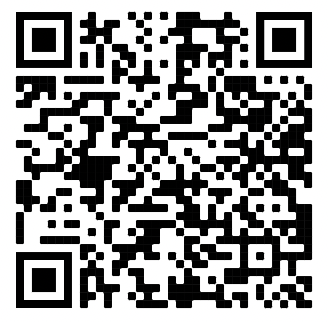

## Все необходимые библиотеки

In [ ]:
#!pip install pylatexenc qiskit 
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

## Симуляторы, вероятностный и векторный

In [ ]:
qasm_backend = Aer.get_backend('qasm_simulator')
vect_backend = Aer.get_backend('statevector_simulator')

## Базовые состояния

In [ ]:
ZERO = [1., 0.]
ONE = [0., 1]

## 1. Операции с NOT (X) от начала до конца

In [ ]:
qr = QuantumRegister(1, 'qubit')
cr = ClassicalRegister(1, 'observation')
qc = QuantumCircuit(qr, cr)

START = ZERO

# нарисуем стартовое состояние
display(Statevector(START).draw('bloch'))
qc.initialize(START, qr)

# применим NOT
qc.x(qr[0])
qc.measure(qr, cr)

# нарисуем программу
display(qc.draw('mpl', scale=3))

# выполним!
counts = qasm_backend.run(transpile(qc, qasm_backend), shots=1000).result().get_counts()
display(plot_histogram(counts))

qc.remove_final_measurements()
vector = vect_backend.run(transpile(qc, vect_backend)).result().get_statevector().data
print("Vector:", vector.real)
display(Statevector(vector).draw('bloch'))

## 2. Оператор Адамара

In [ ]:
qr = QuantumRegister(1, 'qubit')
cr = ClassicalRegister(1, 'observation')
qc = QuantumCircuit(qr, cr)

START = ZERO

# написуем стартовое состояние
display(Statevector(START).draw('bloch'))
qc.initialize(START, qr)

# применим Hadamard
qc.h(qr[0])
qc.measure(qr, cr)

# нарисуем программу
display(qc.draw('mpl', scale=3))

# выполним!
counts = qasm_backend.run(transpile(qc, qasm_backend), shots=1000).result().get_counts()
display(plot_histogram(counts))

qc.remove_final_measurements()
vector = vect_backend.run(transpile(qc, vect_backend)).result().get_statevector().data
print("Vector:", vector.real)
display(Statevector(vector).draw('bloch'))

## 3. Измерение всё портит

In [ ]:
qr = QuantumRegister(1, 'qubit')
cr = ClassicalRegister(1, 'observation')
qc = QuantumCircuit(qr, cr)

START = ZERO

# написуем стартовое состояние
display(Statevector(START).draw('bloch'))
qc.initialize(START, qr)

# применим Hadamard
qc.h(qr[0])
# qc.measure(qr, cr)   # раскомментировать чтобы показать эффект

# применим Hadamard еще раз примерим
qc.h(qr[0])
# добавим изменение
qc.measure(qr, cr)


# нарисуем программу
display(qc.draw('mpl', scale=3))

# выполним!
counts = qasm_backend.run(transpile(qc, qasm_backend), shots=1000).result().get_counts()
display(plot_histogram(counts))

qc.remove_final_measurements()
vector = vect_backend.run(transpile(qc, vect_backend)).result().get_statevector().data
print("Vector:", vector.real)
display(Statevector(vector).draw('bloch'))

## Множественно-контролируемые вентили

In [ ]:
from qiskit.circuit.library import XGate, HGate, ZGate

qc = QuantumCircuit(4)
qc.cx(0, 1)
qc.cz(0, 1)
qc.ch(0, 1)
qc.barrier()
display(qc.draw('mpl', scale=2))

In [ ]:
cx = XGate().control(1)
qc.append(cx, [0, 1])

cz = ZGate().control(1)
qc.append(cz, [0, 1])

ch = HGate().control(1)
qc.append(ch, [0, 1])

qc.barrier()
display(qc.draw('mpl', scale=2))

In [ ]:
ccx = XGate().control(2)
cch = HGate().control(2)
ccz = ZGate().control(2)

qc.append(ccx, [0, 1, 3])
qc.append(ccz, [0, 2, 3])
qc.append(cch, [1, 2, 3])

qc.barrier()
display(qc.draw('mpl', scale=2))

## Сверхплотное кодирование

In [ ]:
asja = QuantumRegister(1, "asja")
balvis = QuantumRegister(1, "balvis")
result = ClassicalRegister(2, "result")
evesdropper = ClassicalRegister(1, "e")
qc = QuantumCircuit(asja, balvis, result, evesdropper)
qc.draw('mpl')

In [ ]:
# состояние Белла для того, чтобы кубиты "знали" друг о друге всё
qc.h(asja)
qc.cx(asja[0], balvis[0])

qc.barrier()

# Балвис получил кубит
qc.id(balvis)
qc.barrier()

# Ася выбирает сообщение 
message = '01'

if message[0] == '1':
    qc.x(asja)
if message[1] == '1':
    qc.z(asja)

qc.barrier()
# Ася отправила кубит Балвису
qc.id(asja) 
qc.barrier()

# а что если нас подслуживают?
qc.measure(asja, evesdropper)

qc.barrier()

# Балвис распутывает
qc.cx(asja[0], balvis[0])
qc.h(asja)

qc.barrier()

qc.measure(asja[:] + balvis[:], result)

display(qc.draw('mpl', style={'displaytext': {'id' : '→'}}))

plot_histogram(qasm_backend.run(transpile(qc, qasm_backend), shots=10).result().get_counts())